# With visualisation

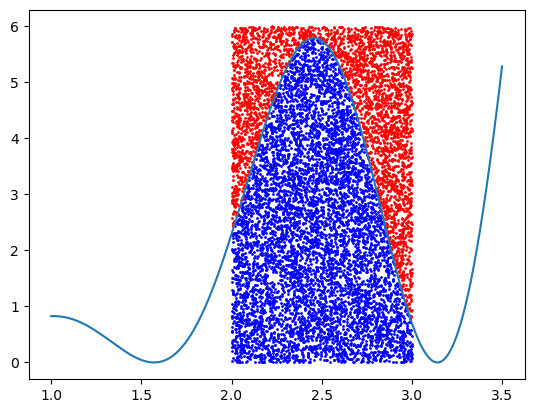

In [32]:
import numpy as np
from matplotlib import pyplot as plt

# number of dots for integration or other things
n_all = 10000

# boundaries of the calculated area
x_1, x_2 = 2, 3
y_1, y_2 = 0, 6

# declare lists for classification of dots
x_below, y_below, x_above, y_above = [], [], [], []

# make the graph, modify function being calculated here
x_axis = np.linspace(1, 3.5, n_all)
y_axis = x_axis**2 * (np.sin(2*x_axis))**2

# mark the calculated area with random dots
x_rand = np.random.uniform(low=x_1, high=x_2, size=n_all)
y_rand = np.random.uniform(low=y_1, high=y_2, size=n_all)


# compare y values of all dots with y value of the function at that dot's x value
for index, x_value in enumerate(x_rand):
    y_func = x_value**2 * (np.sin(2*x_value))**2
    y_value = y_rand[index]

    # classify them into the corresponding lists
    if y_value <= y_func:
        y_below.append(y_value)
        x_below.append(x_value)
    else:
        y_above.append(y_value)
        x_above.append(x_value)

# how many dots are below the function
n_below = len(y_below)

# calculate area
area = (n_below/n_all) * ((x_2-x_1) * (y_2-y_1))
#print(area)


# plot the graph for visualisation
fig, ax = plt.subplots(nrows=1, ncols=1)

# the function
ax.plot(x_axis, y_axis)
# the random dots, below = blue, above = red
ax.scatter(x_below, y_below, color='blue', s=1)
ax.scatter(x_above, y_above, color='red', s=1)

plt.show()

# Without visualisation

In [63]:
from numpy import random as rd
from matplotlib import pyplot as plt

# number of dots for integration
n_all = 10000000

# boundaries of the calculated area
x_1, x_2 = 2, 3
y_1, y_2 = 0, 6

# declare list for dots below the function
y_below = []

# mark the calculated area with random dots
x_rand = rd.uniform(low=x_1, high=x_2, size=n_all)
y_rand = rd.uniform(low=y_1, high=y_2, size=n_all)

# add a '1' every time y_i <= f(x_i), check length for how many dots under the function
n_below = sum([1 for index, x in enumerate(x_rand) if y_rand[index] <= (x**2 * (np.sin(2*x))**2)])

# calculate area
area = (n_below/n_all) * ((x_2-x_1) * (y_2-y_1))
print(area)

4.064883


# Task 1

## Creating the Monte Carlo algorithm (MCA)

In [22]:
import numpy as np

def mcAlg(function, x_range, y_range, n_all=10000000):
    '''
    Computes the area between a function and y = 0 using Monte Carlo algorithm.
    
    Arguments
    ---------
    function: lambda x: [function]
        the function to find the area under
        
    x_range: [a,b] (a included but b excluded)
        the x-value range for area calculation
        
    y_range: [a,b] (a included but b excluded)
        the y-value range for calculation of area
        
    n_all: int
        the number of dots to estimate the area with
        the higher the number, the more accurate the result, but the longer the calculation time

    Returns
    -------
    area: float
        the area between function and y = 0
    '''
    
    # boundaries of the calculated area
    x_1, x_2 = x_range
    y_1, y_2 = y_range
    
    # mark the calculated area with random dots
    x_rand = np.random.uniform(low=x_1, high=x_2, size=n_all)
    y_rand = np.random.uniform(low=y_1, high=y_2, size=n_all)
    
    # masks all dots below the function as True (1) and
    # sum all the '1's up to count the number of dots below the function
    n_below = np.sum(y_rand <= function(x_rand))
    
    # calculate area
    area = (n_below/n_all) * ((x_2-x_1) * (y_2-y_1))
    return area



print(mcAlg(lambda x: x**2 * (np.sin(2*x))**2, [2,3], [0,6]))

4.065307799999999


# Task 2

## Check estimate produced by MCA

With $n_{all} = 10000000$, the estimate is accurate for the first 2 digits after the decimal point.

In [23]:
import numpy as np

def mcAlg(function, x_range, y_range, n_all=10000000):
    '''
    Computes the area between a function and y = 0 using Monte Carlo algorithm.
    
    Arguments
    ---------
    function: lambda x: [function]
        the function to find the area under
        
    x_range: [a,b] (a included but b excluded)
        the x-value range for area calculation
        
    y_range: [a,b] (a included but b excluded)
        the y-value range for calculation of area
        
    n_all: int
        the number of dots to estimate the area with
        the higher the number, the more accurate the result, but the longer the calculation time

    Returns
    -------
    area: float
        the area between function and y = 0
    '''
    
    # boundaries of the calculated area
    x_1, x_2 = x_range
    y_1, y_2 = y_range
    
    # mark the calculated area with random dots
    x_rand = np.random.uniform(low=x_1, high=x_2, size=n_all)
    y_rand = np.random.uniform(low=y_1, high=y_2, size=n_all)
    
    # masks all dots below the function as True (1) and
    # sum all the '1's up to count the number of dots below the function
    n_below = np.sum(y_rand <= function(x_rand))
    
    # calculate area
    area = (n_below/n_all) * ((x_2-x_1) * (y_2-y_1))
    return area



print(mcAlg(lambda x: x**2 * (np.sin(2*x))**2, [2,3], [0,6]))

4.0643712


## Effect of changing $n_{all}$

In [24]:
import numpy as np

def mcAlg(function, x_range, y_range, n_all=10000000):
    '''
    Computes the area between a function and y = 0 using Monte Carlo algorithm.
    
    Arguments
    ---------
    function: lambda x: [function]
        the function to find the area under
        
    x_range: [a,b] (a included but b excluded)
        the x-value range for area calculation
        
    y_range: [a,b] (a included but b excluded)
        the y-value range for calculation of area
        
    n_all: int
        the number of dots to estimate the area with
        the higher the number, the more accurate the result, but the longer the calculation time

    Returns
    -------
    area: float
        the area between function and y = 0
    '''
    
    # boundaries of the calculated area
    x_1, x_2 = x_range
    y_1, y_2 = y_range
    
    # mark the calculated area with random dots
    x_rand = np.random.uniform(low=x_1, high=x_2, size=n_all)
    y_rand = np.random.uniform(low=y_1, high=y_2, size=n_all)
    
    # masks all dots below the function as True (1) and
    # sum all the '1's up to count the number of dots below the function
    n_below = np.sum(y_rand <= function(x_rand))
    
    # calculate area
    area = (n_below/n_all) * ((x_2-x_1) * (y_2-y_1))
    return area



for n_all in [10, 100, 1000, 10000, 100000, 1000000, 10000000]:
    result = []
    for i in range(10):
        result.append(mcAlg(lambda x: x**2 * (np.sin(2*x))**2, [2,3], [0,6], n_all))
    print(f'Mean +/- standard deviation for n_all = {n_all:>8}: {np.mean(result):.7f} +/- {np.std(result, ddof = 1):.7f}')

Mean +/- standard deviation for n_all =       10: 3.5400000 +/- 0.7720104
Mean +/- standard deviation for n_all =      100: 3.9180000 +/- 0.2638939
Mean +/- standard deviation for n_all =     1000: 4.1064000 +/- 0.0964655
Mean +/- standard deviation for n_all =    10000: 4.0536000 +/- 0.0185041
Mean +/- standard deviation for n_all =   100000: 4.0614540 +/- 0.0088188
Mean +/- standard deviation for n_all =  1000000: 4.0636722 +/- 0.0023987
Mean +/- standard deviation for n_all = 10000000: 4.0650646 +/- 0.0007079


There seems to be an increase in accuracy (closer to the actual value of the integral, 4.0647) and precision (lower standard deviation) of the results when $n_{all}$ is increased.

# Task 3

For $X_i$ drawn uniformly, the Monte Carlo estimator (MCE) is described as follows.
$$
\int_{a}^{b}f(x)dx \approx (b-a) \dfrac{1}{N} \sum_{i=0}^{N-1}f(X_i)
$$

Shown below is the usage of MCE to evaluate the following integral.
$$
\int_{x=2}^{x=3}x^2 \sin^2{(2x)} dx
$$

In [31]:
import numpy as np

def mcEst(function, x_range, n_all=10000000):
    '''
    Computes the area between a function and y = 0 using Monte Carlo estimator.
    
    Arguments
    ---------
    function: lambda x: [function]
        the function to find the area under
        
    x_range: [a,b] (a included but b excluded)
        the x-value range for area calculation
        
    n_all: int
        the number of dots to estimate the area with
        the higher the number, the more accurate the result, but the longer the calculation time

    Returns
    -------
    area: float
        the area between function and y = 0
    '''
    
    # boundaries of the calculated area
    x_1, x_2 = x_range

    # computing f(X_i) with X_i being a continuous random variable from x_1 to x_2
    x_rand = np.random.uniform(low=x_1, high=x_2, size=n_all)
    y_rand = function(x_rand)
    
    # applying the formula for Monte Carlo estimator
    area = (x_2-x_1) * (1/n_all) * np.sum(y_rand)
    return area



print(mcEst(lambda x: x**2 * np.sin(2*x)**2, [2,3]))

4.064852393649793


## Comparing the result of MCE with MCA

In [26]:
import numpy as np
import scipy as sp

def mcEst(function, x_range, n_all=10000000):
    '''
    Computes the area between a function and y = 0 using Monte Carlo estimator.
    
    Arguments
    ---------
    function: lambda x: [function]
        the function to find the area under
        
    x_range: [a,b] (a included but b excluded)
        the x-value range for area calculation
        
    n_all: int
        the number of dots to estimate the area with
        the higher the number, the more accurate the result, but the longer the calculation time

    Returns
    -------
    area: float
        the area between function and y = 0
    '''
    
    # boundaries of the calculated area
    x_1, x_2 = x_range

    # computing f(X_i) with X_i being a continuous random variable from x_1 to x_2
    x_rand = np.random.uniform(low=x_1, high=x_2, size=n_all)
    y_rand = function(x_rand)
    
    # applying the formula for Monte Carlo estimator
    area = (x_2-x_1) * (1/n_all) * np.sum(y_rand)
    return area



def mcAlg(function, x_range, y_range, n_all=10000000):
    '''
    Computes the area between a function and y = 0 using Monte Carlo algorithm.
    
    Arguments
    ---------
    function: lambda x: [function]
        the function to find the area under
        
    x_range: [a,b] (a included but b excluded)
        the x-value range for area calculation
        
    y_range: [a,b] (a included but b excluded)
        the y-value range for calculation of area
        
    n_all: int
        the number of dots to estimate the area with
        the higher the number, the more accurate the result, but the longer the calculation time

    Returns
    -------
    area: float
        the area between function and y = 0
    '''
    
    # boundaries of the calculated area
    x_1, x_2 = x_range
    y_1, y_2 = y_range
    
    # mark the calculated area with random dots
    x_rand = np.random.uniform(low=x_1, high=x_2, size=n_all)
    y_rand = np.random.uniform(low=y_1, high=y_2, size=n_all)
    
    # masks all dots below the function as True (1) and
    # sum all the '1's up to count the number of dots below the function
    n_below = np.sum(y_rand <= function(x_rand))
    
    # calculate area
    area = (n_below/n_all) * ((x_2-x_1) * (y_2-y_1))
    return area



mc_alg_results, mc_est_results = [], []
for i in range(10):
    mc_alg_results.append(mcAlg(lambda x: x**2 * np.sin(2*x)**2, [2,3], [0,6]))
    mc_est_results.append(mcEst(lambda x: x**2 * np.sin(2*x)**2, [2,3]))

print(f'Mean +/- standard deviation for mcAlg: {np.mean(mc_alg_results):.7f} +/- {np.std(mc_alg_results, ddof=1):.7f}')
print(f'Mean +/- standard deviation for mcEst: {np.mean(mc_est_results):.7f} +/- {np.std(mc_est_results, ddof=1):.7f}', end='\n\n')

print(f'The means of mcAlg and mcEst are not significantly different (p = {sp.stats.ttest_ind(mc_alg_results, mc_est_results)[1]:.7f}).', end='\n\n')
print(f'The means of mcAlg (p = {sp.stats.ttest_1samp(mc_alg_results, 4.0647)[1]:.7f}) and mcEst (p = {sp.stats.ttest_1samp(mc_est_results, 4.0647)[1]:.7f}) are not significantly different from the actual value of the integral (4.0647).')

Mean +/- standard deviation for mcAlg: 4.0648767 +/- 0.0009299
Mean +/- standard deviation for mcEst: 4.0646360 +/- 0.0004058

The means of mcAlg and mcEst are not significantly different (p = 0.4627392).

The means of mcAlg (p = 0.5627177) and mcEst (p = 0.6297588) are not significantly different from the actual value of the integral (4.0647).


Since the means of mcAlg and mcEst are not significantly different, and both means are also not significantly different from the actual value of the integral, we can conclude that when using $n_{all} = 10000000$, both MCA and MCE are accurate in computing the value of an integral.

## Comparing the speed of MCA and MCE ($n_{all} = 10000000$)

### mcAlg

In [29]:
%%timeit

import numpy as np

def mcAlg(function, x_range, y_range, n_all=10000000):
    '''
    Computes the area between a function and y = 0 using Monte Carlo algorithm.
    
    Arguments
    ---------
    function: lambda x: [function]
        the function to find the area under
        
    x_range: [a,b] (a included but b excluded)
        the x-value range for area calculation
        
    y_range: [a,b] (a included but b excluded)
        the y-value range for calculation of area
        
    n_all: int
        the number of dots to estimate the area with
        the higher the number, the more accurate the result, but the longer the calculation time

    Returns
    -------
    area: float
        the area between function and y = 0
    '''
    
    # boundaries of the calculated area
    x_1, x_2 = x_range
    y_1, y_2 = y_range
    
    # mark the calculated area with random dots
    x_rand = np.random.uniform(low=x_1, high=x_2, size=n_all)
    y_rand = np.random.uniform(low=y_1, high=y_2, size=n_all)
    
    # masks all dots below the function as True (1) and
    # sum all the '1's up to count the number of dots below the function
    n_below = np.sum(y_rand <= function(x_rand))
    
    # calculate area
    area = (n_below/n_all) * ((x_2-x_1) * (y_2-y_1))
    return area



mcAlg(lambda x: x**2 * np.sin(2*x)**2, [2,3], [0,6])

307 ms ± 5.98 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### mcEst

In [30]:
%%timeit

import numpy as np

def mcEst(function, x_range, n_all=10000000):
    '''
    Computes the area between a function and y = 0 using Monte Carlo estimator.
    
    Arguments
    ---------
    function: lambda x: [function]
        the function to find the area under
        
    x_range: [a,b] (a included but b excluded)
        the x-value range for area calculation
        
    n_all: int
        the number of dots to estimate the area with
        the higher the number, the more accurate the result, but the longer the calculation time

    Returns
    -------
    area: float
        the area between function and y = 0
    '''
    
    # boundaries of the calculated area
    x_1, x_2 = x_range

    # computing f(X_i) with X_i being a continuous random variable from x_1 to x_2
    x_rand = np.random.uniform(low=x_1, high=x_2, size=n_all)
    y_rand = function(x_rand)
    
    # applying the formula for Monte Carlo estimator
    area = (x_2-x_1) * (1/n_all) * np.sum(y_rand)
    return area



mcEst(lambda x: x**2 * np.sin(2*x)**2, [2,3])

234 ms ± 4.69 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


As can be seen from the results, for $n_{all} = 10000000$, MCE is around 1.31 times as fast as MCA (234 ms ± 4.69 ms compared to 307 ms ± 5.98 ms).

We suspect that MCE is faster than MCA because it only has to create one array of randomly generated numbers, while MCA has to create two arrays.

MCE also has another advantage over MCA in that it does not require defining the $y$ interval of where to draw the random dots. This is great since to use MCE, we do not need to know how the function looks like in the chosen $x$ interval. On the other hand, to use MCA, we need to know the local maxima and minima of the function in the chosen $x$ interval to assign the $y$ interval. If we put a random $y$ interval, we cannot be sure that the entire area under the function is represented in the calculation of the area.

# Task 4

We choose to use MCE to evaluate the integral $\int_{0}^{1} e^{-x^2} \cos^2{(3x)} dx$ because we do not have to know how the function looks like in the interval $[0,1]$ and because MCE is slightly faster than MCA.

In [37]:
import numpy as np

def mcEst(function, x_range, n_all=10000000):
    '''
    Computes the area between a function and y = 0 using Monte Carlo estimator.
    
    Arguments
    ---------
    function: lambda x: [function]
        the function to find the area under
        
    x_range: [a,b] (a included but b excluded)
        the x-value range for area calculation
        
    n_all: int
        the number of dots to estimate the area with
        the higher the number, the more accurate the result, but the longer the calculation time

    Returns
    -------
    area: float
        the area between function and y = 0
    '''
    
    # boundaries of the calculated area
    x_1, x_2 = x_range

    # computing f(X_i) with X_i being a continuous random variable from x_1 to x_2
    x_rand = np.random.uniform(low=x_1, high=x_2, size=n_all)
    y_rand = function(x_rand)
    
    # applying the formula for Monte Carlo estimator
    area = (x_2-x_1) * (1/n_all) * np.sum(y_rand)
    return area



mce_results = [mcEst(lambda x: np.exp(-(x**2)) * np.cos(3*x)**2, [0,1]) for i in range(10)]
    
print(f'MCE result: {np.mean(mce_results):.6f} +/- {np.std(mce_results, ddof=1):.6f}')
print(f'Wolfram Alpha result: 0.355322', end='\n\n')

print(f'The mean of MCE is not significantly different from the Wolfram Alpha result (p = {sp.stats.ttest_1samp(mce_results, 0.355322)[1]:.6f}).')

MCE result: 0.355324 +/- 0.000093
Wolfram Alpha result: 0.355322

The mean of MCE is not significantly different from the Wolfram Alpha result (p = 0.952872).
